In [ ]:
# 201500684 박종혁

In [ ]:
# 1. 통계 예제 실행해보기

In [ ]:
# Basic Setting

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter
import math
import numpy as np
import matplotlib as plt

def sum_of_squares(v):
    return dot(v,v)

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [3]:
# 친구 수 히스토그램

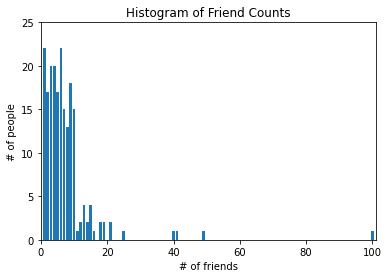

In [96]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,
               11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,
               9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,
               6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,
               4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

def make_friend_counts_histogram(plt):
    friend_counts = Counter(num_friends)
    xs = range(101)
    ys = [friend_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0, 101, 0, 25])
    plt.title("Histogram of Friend Counts")
    plt.xlabel("# of friends")
    plt.ylabel("# of people")
    plt.show()
    
# %pylab inline

make_friend_counts_histogram(plt)

In [ ]:
# 기본 통계치

In [ ]:
num_points = len(num_friends)
largest_value = max(num_friends)
smallest_vlaue = min(num_friends)
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

print(num_points)
print(largest_value)
print(smallest_vlaue)
print(sorted_values)
print(smallest_value)
print(second_smallest_value)
print(second_largest_value)

In [5]:
# 중심 경향성

In [6]:
def mean(x):
    return sum(x)/len(x)

mean(num_friends)
np.mean(num_friends)

7.333333333333333

7.333333333333333

In [7]:
# 중심 경향성: 중앙값

In [8]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n%2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

median(num_friends)
np.median(num_friends)

6.0

6.0

In [9]:
# 분위

In [10]:
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

for i in range(0, 100, 25):
    print("%.2f Percentage value" %(i*0.01), quantile(num_friends, i*0.01))

np.percentile(num_friends, [i for i in range(0, 100, 25)])

0.00 Percentage value 1
0.25 Percentage value 3
0.50 Percentage value 6
0.75 Percentage value 9


array([1., 3., 6., 9.])

In [11]:
# 최빈값

In [12]:
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]

mode(num_friends)

[6, 1]

In [13]:
# 산포도: 범위

In [14]:
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)
np.max(num_friends) - np.min(num_friends)

99

99

In [15]:
# 분산

In [17]:
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)

variance(num_friends)

%timeit variance(num_friends)
%timeit np.var(num_friends)

81.54351395730716

33.9 µs ± 6.62 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
34.4 µs ± 1.67 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
# 표준편차와 사분위간 분위

In [18]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

np.std(num_friends, dtype=np.float64)

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

9.03014473623248

9.007984838446012

6

In [ ]:
# 공분산

In [21]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,
                 27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,
                 36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,
                 19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,
                 36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,
                 17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,
                 39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,
                 41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,
                 33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,
                 35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,
                 14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,
                 18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,
                 27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,
                 22.61,26.89,23.48,8.38,27.81,32.35,23.84]

def covariance(x,y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

covariance(num_friends, daily_minutes)

np.cov(num_friends,daily_minutes)

22.425435139573064

array([[ 81.54351396,  22.42543514],
       [ 22.42543514, 100.78589895]])

In [ ]:
# Correlation

22.425435139573064

array([[1.        , 0.24736957],
       [0.24736957, 1.        ]])

(0.0, 110.0, 0.0, 78.77)

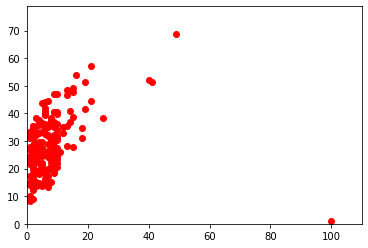

In [27]:
import matplotlib.pyplot as plt

def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y)
    else:
        return 0
    
correlation(num_friends, daily_minutes)

np.corrcoef(num_friends, daily_minutes)

plt.plot(num_friends, daily_minutes, 'ro')
plt.axis([0, max(num_friends)+10, 0, max(daily_minutes)+10])
plt.show()

In [ ]:
# 이상치를 제거한 상관관계

(0.0, 59.0, 0.0, 78.77)

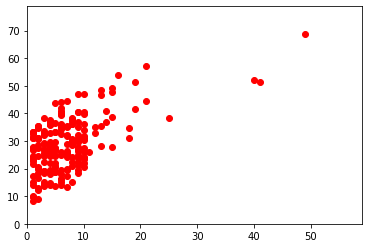

In [32]:
outlier = num_friends.index(100) # 이상치

num_friends_good = [x for i, x in enumerate(num_friends)
                  if i != outlier]

daily_minutes_good = [x for i, x in enumerate(daily_minutes)
                     if i != outlier]

plt.plot(num_friends_good, daily_minutes_good, 'ro')
plt.axis([0, max(num_friends_good)+10, 0, max(daily_minutes_good)+10])
plt.show()

In [ ]:
# 2. height-weight.csv 시각화하기

,Height,Weight
Gender,,
0,69.026346,187.020621
1,63.708774,135.860093


,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801
...,...,...,...
9995,1,66.172652,136.777454
9996,1,67.067155,170.867906
9997,1,63.867992,128.475319
9998,1,69.034243,163.852461


(49.2631333250971, 83.9987423463896, 59.700126712753004, 274.989698505106)

Text(0.5, 1.0, 'Height-Weight Plotting')

Text(0.5, 0, 'Height in inches')

Text(0, 0.5, 'Weight in Lis')

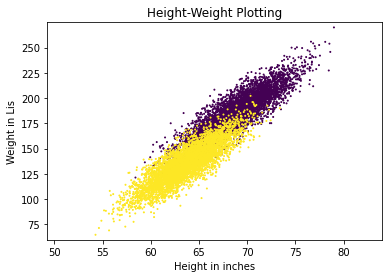

In [81]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# 1. 원데이터 시각화
hw = pandas.read_csv("height-weight.csv")
hw_df['Gender'] = hw.Gender
hw_df['Gender'] = hw_df['Gender'].map({"Male": 0, "Female": 1})
hw_df

height = hw.iloc[:,1]
weight = hw.iloc[:,2]

plt.scatter(height, weight, c=hw_df.Gender, s=1)
plt.axis([min(height)-5, max(height)+5, min(weight)-5, max(weight)+5])
plt.title("Height-Weight Plotting")
plt.xlabel("Height in inches")
plt.ylabel("Weight in Lis")
plt.show()

In [86]:
# 2. 평균
hw.groupby(['Gender']).mean()
print("키 전체 평균:", np.mean(height))
print("몸무게 전체 평균:",np.mean(weight))

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


키 전체 평균: 66.36755975482106
몸무게 전체 평균: 161.44035683283076


In [88]:
# 3. 중앙값
hw.groupby(['Gender']).median()
print("키 전체 평균:", np.median(height))
print("몸무게 전체 평균:",np.median(weight))

# 평균값과 유사하나, 약간의 차이를 보인다.

,Height,Weight
Gender,,
Female,63.730924,136.117583
Male,69.027709,187.033546


키 전체 평균: 66.31807008178464
몸무게 전체 평균: 161.21292769948298


In [94]:
# 4. 분위
print("키 전체 분위:")
np.percentile(height, [i for i in range(0, 100, 25)])
print("몸무게 전체 분위:")
np.percentile(weight, [i for i in range(0, 100, 25)])

키 전체 분위:


array([54.26313333, 63.50562048, 66.31807008, 69.17426173])

몸무게 전체 분위:


array([ 64.70012671, 135.81805131, 161.2129277 , 187.16952487])

In [100]:
# 5. 최빈값
print("최빈값")

h_vals,counts = np.unique(height, return_counts=True)
index = np.argmax(counts)
h_vals[index]

w_vals,counts = np.unique(weight, return_counts=True)
index = np.argmax(counts)
w_vals[index]

최빈값


54.2631333250971

64.700126712753

In [102]:
# 6. 산포도
print("키 전체 분포 범위:", np.max(height)-np.min(height))
print("몸무게 전체 분포 범위:", np.max(weight)-np.min(weight))

키 전체 분포 범위: 24.735609021292504
몸무게 전체 분포 범위: 205.289571792353


In [ ]:
# 7. 분산

In [ ]:
# 8.표준편차

In [ ]:
# 9. 공분산

In [ ]:
# 10. 상관관계

In [ ]:
# 201500684 박종혁